# Setting Up

## Init

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import collections # For frequency counting
import findspark
findspark.init("../../spark2/")

import pyspark
from pyspark.sql import DataFrameNaFunctions
from pyspark.sql.functions import lit # Create columns of *literal* value
from pyspark.sql.functions import col # Returns a Column based on the 
                                      # given column name
from pyspark.ml.feature import StringIndexer #label encoding
from pyspark.ml import Pipeline

sc = pyspark.SparkContext(appName="helloworld")

## SparkSession

In [2]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

## Data

In [3]:
trainDF = spark.read.csv("../data/titanic/train.csv", header="true")
testDF = spark.read.csv("../data/titanic/test.csv", header="true")

**Combine train and test data.**

In [4]:
trainDF.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [5]:
trainDF.select(['Embarked']).collect()

[Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='Q'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='Q'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='Q'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='Q'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='C'),
 Row(Embarked='Q'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='S'),
 Row(Embarked='S'),
 Row(Embarked='C'),
 Row(Embarked='C'),
 Row(Embarked='Q'),
 Row(Embarked='S'),
 Row(Embarked='Q'),
 Row(Embarked='Q'),
 Row(Embarked='C'),
 Row(Embarked='S'),


In [6]:
trainDF.select(['Embarked']).show()

+--------+
|Embarked|
+--------+
|       S|
|       C|
|       S|
|       S|
|       S|
|       Q|
|       S|
|       S|
|       S|
|       C|
|       S|
|       S|
|       S|
|       S|
|       S|
|       S|
|       Q|
|       S|
|       S|
|       C|
+--------+
only showing top 20 rows



In [7]:
trainDF = trainDF.withColumn('Mark', lit('train'))

In [8]:
trainDF.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Mark']

In [9]:
trainDF.select(['Mark']).show()

+-----+
| Mark|
+-----+
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
|train|
+-----+
only showing top 20 rows



In [10]:
## Add Survived column to test, and dataset name as a column
testDF = (testDF.withColumn('Survived',lit(0))
                .withColumn('Mark', lit('test')))
testDF = testDF[trainDF.columns]

## Append Test data to Train data
df = trainDF.unionAll(testDF)

In [11]:
df.count()

1309

In [99]:
df.describe().show()

+-------+--------------------+------+------------------+-----+--------+-----+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------+
|summary|                Name|   Sex|            Ticket|Cabin|Embarked| Mark|      PassengerId|            Pclass|             SibSp|             Parch|           Survived|               Age|              Fare|       Title|
+-------+--------------------+------+------------------+-----+--------+-----+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------+
|  count|                1309|  1309|              1309|  295|    1309| 1309|             1309|              1309|              1309|              1309|               1309|              1309|              1309|        1309|
|   mean|                null|  null| 249039.1368861024| null|    null| null|            655.0| 2.294881

In [13]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Mark']

In [14]:
len(df.columns)

13

# Steps in a Machine Learning Workflow

* Data Collection
* Data Preprocessing
* Feature Engineering
* Data format translation
* Modeling
* Evaluation and Selection

## Data Collection

* Combiniing Datasets

## Data Preprocessing

### Exploratory Data Analysis

* Statistical Summary
* Histograms
* Correlations

#### What is the schema?

In [15]:
df.columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Mark']

In [16]:
df.printSchema()

root
 |-- PassengerId: string (nullable = true)
 |-- Survived: string (nullable = true)
 |-- Pclass: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- SibSp: string (nullable = true)
 |-- Parch: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Mark: string (nullable = false)



#### Which ones are numeric?

In [17]:
df.show(5)

+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+-----+
|PassengerId|Survived|Pclass|                Name|   Sex|Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked| Mark|
+-----------+--------+------+--------------------+------+---+-----+-----+----------------+-------+-----+--------+-----+
|          1|       0|     3|Braund, Mr. Owen ...|  male| 22|    1|    0|       A/5 21171|   7.25| null|       S|train|
|          2|       1|     1|Cumings, Mrs. Joh...|female| 38|    1|    0|        PC 17599|71.2833|  C85|       C|train|
|          3|       1|     3|Heikkinen, Miss. ...|female| 26|    0|    0|STON/O2. 3101282|  7.925| null|       S|train|
|          4|       1|     1|Futrelle, Mrs. Ja...|female| 35|    1|    0|          113803|   53.1| C123|       S|train|
|          5|       0|     3|Allen, Mr. Willia...|  male| 35|    0|    0|          373450|   8.05| null|       S|train|
+-----------+--------+------+-----------

Here are the variables which should be numeric (float or integer):

* PassengerId: Integer
* Pclass: Integer
* SibSp: Integer
* Parch: Integer
* Survived: Integer
* Age: Float
* Fare: Float

### Correcting Datatypes

In [18]:
# Here is an example
df = df.withColumn("AgeTmp", df["Age"].cast("float")) \
    .drop("Age") \
    .withColumnRenamed("AgeTmp", "Age")

In [19]:
# Let's define function
def to_anytype(df, colnames, typename):
    for colname in colnames:
        df = df.withColumn("tmp", df[colname].cast(typename)) \
        .drop(colname) \
        .withColumnRenamed("tmp", colname)
    return(df)

In [20]:
intCols = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Survived']
floatCols = ['Age', 'Fare']

df = to_anytype(df, intCols, "integer")
df = to_anytype(df, floatCols, "float")

In [21]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Mark: string (nullable = false)
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Age: float (nullable = true)
 |-- Fare: float (nullable = true)



#### Let's inspect data

In [22]:
df.take(5)

[Row(Name='Braund, Mr. Owen Harris', Sex='male', Ticket='A/5 21171', Cabin=None, Embarked='S', Mark='train', PassengerId=1, Pclass=3, SibSp=1, Parch=0, Survived=0, Age=22.0, Fare=7.25),
 Row(Name='Cumings, Mrs. John Bradley (Florence Briggs Thayer)', Sex='female', Ticket='PC 17599', Cabin='C85', Embarked='C', Mark='train', PassengerId=2, Pclass=1, SibSp=1, Parch=0, Survived=1, Age=38.0, Fare=71.2833023071289),
 Row(Name='Heikkinen, Miss. Laina', Sex='female', Ticket='STON/O2. 3101282', Cabin=None, Embarked='S', Mark='train', PassengerId=3, Pclass=3, SibSp=0, Parch=0, Survived=1, Age=26.0, Fare=7.925000190734863),
 Row(Name='Futrelle, Mrs. Jacques Heath (Lily May Peel)', Sex='female', Ticket='113803', Cabin='C123', Embarked='S', Mark='train', PassengerId=4, Pclass=1, SibSp=1, Parch=0, Survived=1, Age=35.0, Fare=53.099998474121094),
 Row(Name='Allen, Mr. William Henry', Sex='male', Ticket='373450', Cabin=None, Embarked='S', Mark='train', PassengerId=5, Pclass=3, SibSp=0, Parch=0, Survive

In [23]:
df.show(5)

+--------------------+------+----------------+-----+--------+-----+-----------+------+-----+-----+--------+----+-------+
|                Name|   Sex|          Ticket|Cabin|Embarked| Mark|PassengerId|Pclass|SibSp|Parch|Survived| Age|   Fare|
+--------------------+------+----------------+-----+--------+-----+-----------+------+-----+-----+--------+----+-------+
|Braund, Mr. Owen ...|  male|       A/5 21171| null|       S|train|          1|     3|    1|    0|       0|22.0|   7.25|
|Cumings, Mrs. Joh...|female|        PC 17599|  C85|       C|train|          2|     1|    1|    0|       1|38.0|71.2833|
|Heikkinen, Miss. ...|female|STON/O2. 3101282| null|       S|train|          3|     3|    0|    0|       1|26.0|  7.925|
|Futrelle, Mrs. Ja...|female|          113803| C123|       S|train|          4|     1|    1|    0|       1|35.0|   53.1|
|Allen, Mr. Willia...|  male|          373450| null|       S|train|          5|     3|    0|    0|       0|35.0|   8.05|
+--------------------+------+---

#### Statistical Summary

In [24]:
df.describe('Age').show()

+-------+------------------+
|summary|               Age|
+-------+------------------+
|  count|              1046|
|   mean|29.881137667305726|
| stddev|14.413493211267733|
|    min|              0.17|
|    max|              80.0|
+-------+------------------+



In [25]:
df.describe(['Age', 'Name']).show()

+-------+------------------+--------------------+
|summary|               Age|                Name|
+-------+------------------+--------------------+
|  count|              1046|                1309|
|   mean|29.881137667305726|                null|
| stddev|14.413493211267733|                null|
|    min|              0.17|"Andersson, Mr. A...|
|    max|              80.0|van Melkebeke, Mr...|
+-------+------------------+--------------------+



In [26]:
df.describe(trainDF.columns).show()

+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+------------------+------------------+-----------------+-----+--------+-----+
|summary|      PassengerId|           Survived|            Pclass|                Name|   Sex|               Age|             SibSp|             Parch|            Ticket|             Fare|Cabin|Embarked| Mark|
+-------+-----------------+-------------------+------------------+--------------------+------+------------------+------------------+------------------+------------------+-----------------+-----+--------+-----+
|  count|             1309|               1309|              1309|                1309|  1309|              1046|              1309|              1309|              1309|             1308|  295|    1307| 1309|
|   mean|            655.0| 0.2612681436210848| 2.294881588999236|                null|  null|29.881137667305726|0.4988540870893812|0.3850267379679144| 249039.1

In [27]:
df.describe(trainDF.columns[1:4]).show()

+-------+-------------------+------------------+--------------------+
|summary|           Survived|            Pclass|                Name|
+-------+-------------------+------------------+--------------------+
|  count|               1309|              1309|                1309|
|   mean| 0.2612681436210848| 2.294881588999236|                null|
| stddev|0.43949364010802755|0.8378360189701275|                null|
|    min|                  0|                 1|"Andersson, Mr. A...|
|    max|                  1|                 3|van Melkebeke, Mr...|
+-------+-------------------+------------------+--------------------+



In [28]:
df.describe(trainDF.columns[5:8]).show()

+-------+------------------+------------------+------------------+
|summary|               Age|             SibSp|             Parch|
+-------+------------------+------------------+------------------+
|  count|              1046|              1309|              1309|
|   mean|29.881137667305726|0.4988540870893812|0.3850267379679144|
| stddev|14.413493211267733|1.0416583905961019|0.8655602753495152|
|    min|              0.17|                 0|                 0|
|    max|              80.0|                 8|                 9|
+-------+------------------+------------------+------------------+



In [29]:
df.describe(trainDF.columns[9:12]).show()

+-------+-----------------+-----+--------+
|summary|             Fare|Cabin|Embarked|
+-------+-----------------+-----+--------+
|  count|             1308|  295|    1307|
|   mean|33.29547938203228| null|    null|
| stddev|51.75866881037215| null|    null|
|    min|              0.0|  A10|       C|
|    max|         512.3292|    T|       S|
+-------+-----------------+-----+--------+



#### Histograms

* We need the frequency count of various levels

In [30]:
trainDF.createOrReplaceTempView("train")

age_hist = spark.sql(
    "SELECT Age AS age, \
            count(*) AS count \
    FROM train \
    GROUP BY Age \
    ORDER BY Age")
age_hist.show(n=age_hist.count())

+----+-----+
| age|count|
+----+-----+
|null|  177|
|0.42|    1|
|0.67|    1|
|0.75|    2|
|0.83|    2|
|0.92|    1|
|   1|    7|
|  10|    2|
|  11|    4|
|  12|    1|
|  13|    2|
|  14|    6|
|14.5|    1|
|  15|    5|
|  16|   17|
|  17|   13|
|  18|   26|
|  19|   25|
|   2|   10|
|  20|   15|
|20.5|    1|
|  21|   24|
|  22|   27|
|  23|   15|
|23.5|    1|
|  24|   30|
|24.5|    1|
|  25|   23|
|  26|   18|
|  27|   18|
|  28|   25|
|28.5|    2|
|  29|   20|
|   3|    6|
|  30|   25|
|30.5|    2|
|  31|   17|
|  32|   18|
|32.5|    2|
|  33|   15|
|  34|   15|
|34.5|    1|
|  35|   18|
|  36|   22|
|36.5|    1|
|  37|    6|
|  38|   11|
|  39|   14|
|   4|   10|
|  40|   13|
|40.5|    2|
|  41|    6|
|  42|   13|
|  43|    5|
|  44|    9|
|  45|   12|
|45.5|    2|
|  46|    3|
|  47|    9|
|  48|    9|
|  49|    6|
|   5|    4|
|  50|   10|
|  51|    7|
|  52|    6|
|  53|    1|
|  54|    8|
|  55|    2|
|55.5|    1|
|  56|    4|
|  57|    2|
|  58|    5|
|  59|    2|
|   6|    3|

In [31]:
age_hist = spark.sql(
    "SELECT bucket_floor, \
        CONCAT(bucket_floor, ' to ', bucket_ceiling) as bucket_name, \
        count(*) as count \
     FROM ( \
        SELECT floor(Age/5.00)*5 as bucket_floor, \
            floor(Age/5.00)*5 + 5 as bucket_ceiling \
        FROM train \
     ) a \
     GROUP BY 1, 2 \
     ORDER BY 1")

age_hist.show(n=age_hist.count())


+------------+-----------+-----+
|bucket_floor|bucket_name|count|
+------------+-----------+-----+
|        null|       null|  177|
|           0|     0 to 5|   40|
|           5|    5 to 10|   22|
|          10|   10 to 15|   16|
|          15|   15 to 20|   86|
|          20|   20 to 25|  114|
|          25|   25 to 30|  106|
|          30|   30 to 35|   95|
|          35|   35 to 40|   72|
|          40|   40 to 45|   48|
|          45|   45 to 50|   41|
|          50|   50 to 55|   32|
|          55|   55 to 60|   16|
|          60|   60 to 65|   15|
|          65|   65 to 70|    4|
|          70|   70 to 75|    6|
|          80|   80 to 85|    1|
+------------+-----------+-----+



In [100]:
def get_column(df, colname):
    coldata = df.rdd.map(lambda r: r[colname]).collect()
    coldata = ['None' if v is None else v for v in coldata] #replace None values
    return(coldata)

age = get_column(age_hist, "bucket_name")
count = get_column(age_hist, "count")

In [101]:
age

['None',
 '0 to 5',
 '5 to 10',
 '10 to 15',
 '15 to 20',
 '20 to 25',
 '25 to 30',
 '30 to 35',
 '35 to 40',
 '40 to 45',
 '45 to 50',
 '50 to 55',
 '55 to 60',
 '60 to 65',
 '65 to 70',
 '70 to 75',
 '80 to 85']

In [102]:
count

[177, 40, 22, 16, 86, 114, 106, 95, 72, 48, 41, 32, 16, 15, 4, 6, 1]

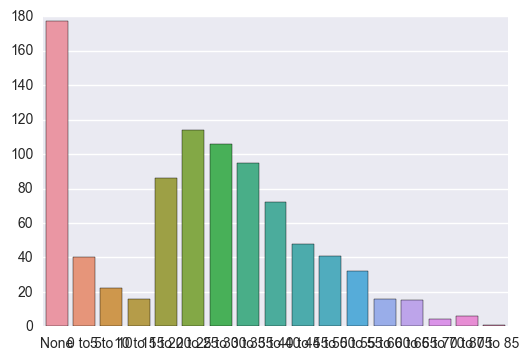

In [33]:
%matplotlib inline

barplt = sns.barplot(age, count)

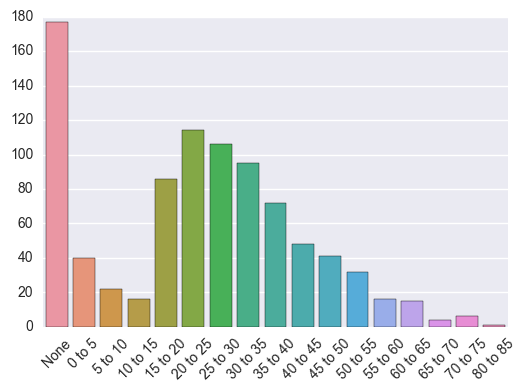

In [34]:
%matplotlib inline

barplt = sns.barplot(age, count)
for item in barplt.get_xticklabels():
    item.set_rotation(45)

#### Histogram Function

In [105]:
def get_column(df, colname):
    coldata = df.rdd.map(lambda r: r[colname]).collect()
    coldata = ['None' if v is None else v for v in coldata] #replace None values
    return(coldata)

def histplot(dfname, colname, binsize):
    binsize = str(binsize)
    dfname.createOrReplaceTempView("tmpDF")
    hist_query = "SELECT bucket_floor, \
        CONCAT(bucket_floor, ' to ', bucket_ceiling) as bucket_name, \
        count(*) as count \
     FROM ( \
        SELECT floor(" + colname + "/" + binsize + ")*" + binsize + " as bucket_floor, \
            floor(" + colname + "/" + binsize + ")*" + binsize + " + " + binsize + " as bucket_ceiling \
        FROM tmpDF \
     ) a \
     GROUP BY 1, 2 \
     ORDER BY 1"
    hist_data = spark.sql(hist_query)
    xvar = get_column(hist_data, "bucket_name")
    count = get_column(hist_data, "count")
    barplt = sns.barplot(xvar, count)
    for item in barplt.get_xticklabels():
        item.set_rotation(45)
    return(barplt)

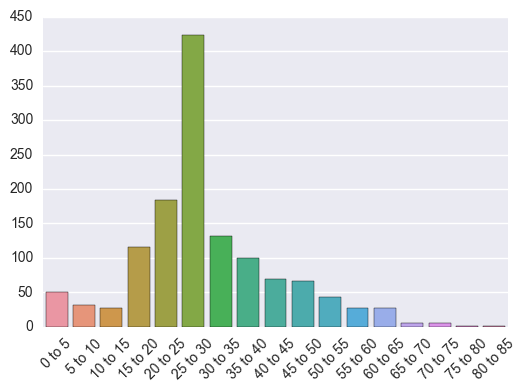

In [106]:
histplot(df, "Age", 5)

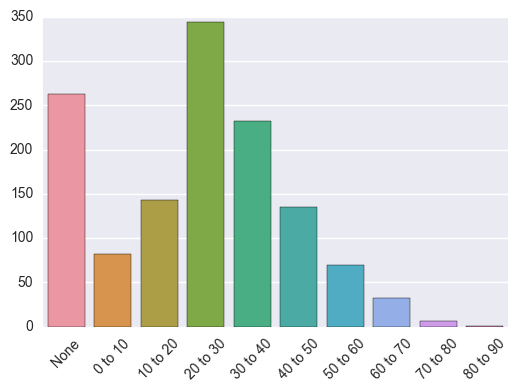

In [37]:
histplot(df, "Age", 10)

#### All Histograms

* Play with various binsizes

In [38]:
df.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)
 |-- Mark: string (nullable = false)
 |-- PassengerId: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Age: float (nullable = true)
 |-- Fare: float (nullable = true)



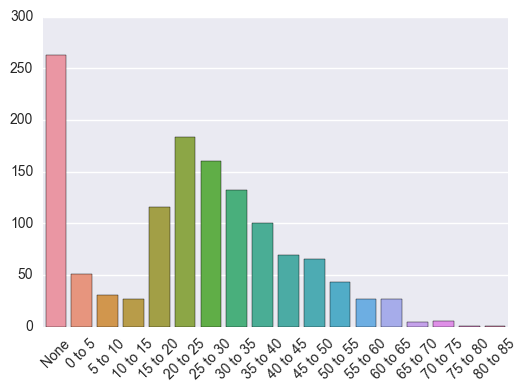

In [39]:
histplot(df, "Age", 5)

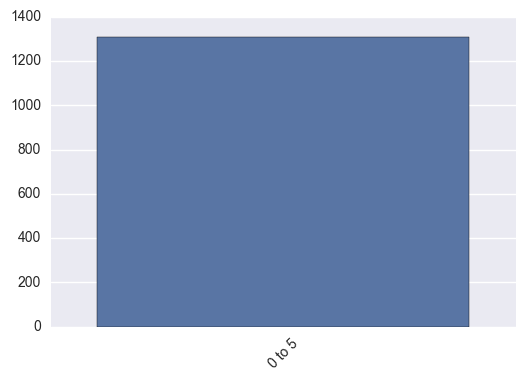

In [40]:
histplot(df, "Survived", 5)

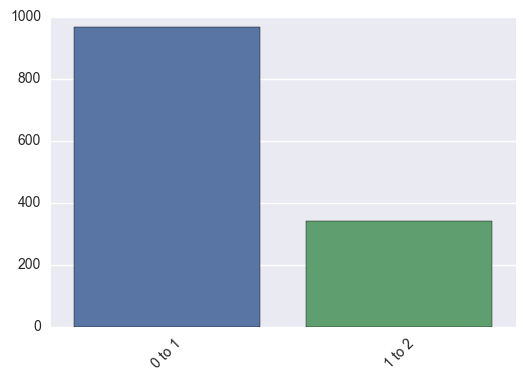

In [41]:
histplot(df, "Survived", 1)

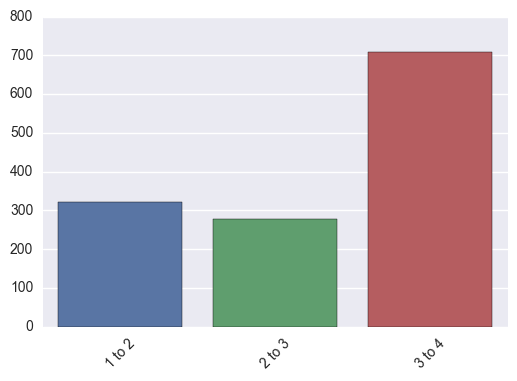

In [42]:
histplot(df, "Pclass", 1)

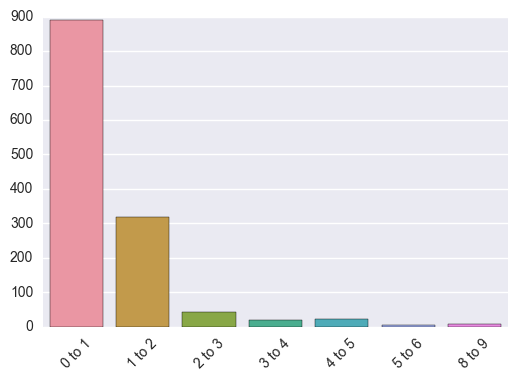

In [43]:
histplot(df, "SibSp", 1)

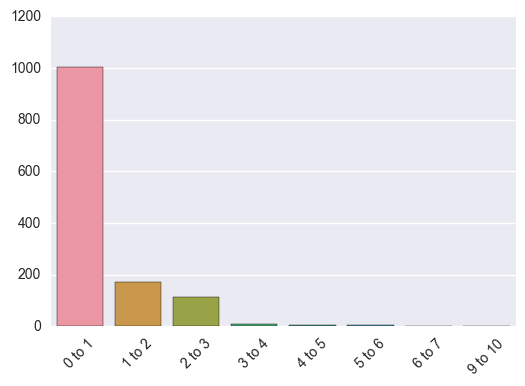

In [44]:
histplot(df, "Parch", 1)

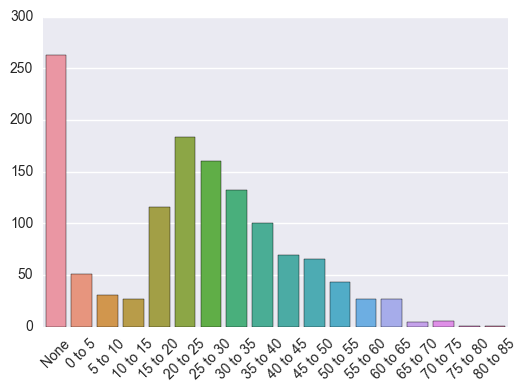

In [45]:
histplot(df, "Age", 5)

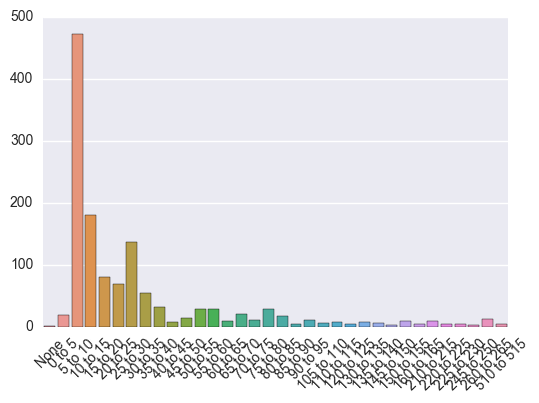

In [46]:
histplot(df, "Fare", 5)

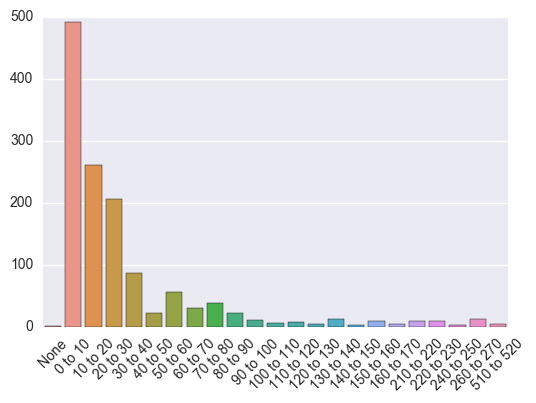

In [47]:
histplot(df, "Fare", 10)

Let's test with a categorical variable.

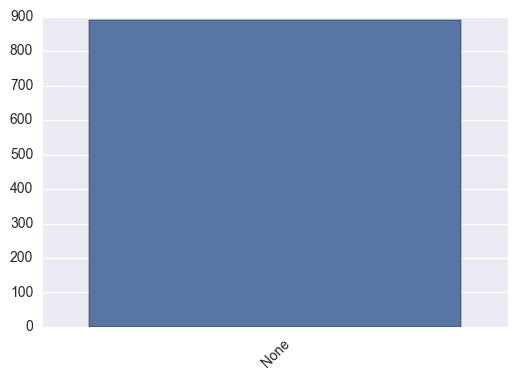

In [48]:
histplot(trainDF, "Embarked", 1)

In [49]:
def histplot_s(df, colname):
    xvar = get_column(df, colname)
    counter = collections.Counter(xvar)
    barplt = sns.barplot(list(counter.keys()), list(counter.values()))
    for item in barplt.get_xticklabels():
        item.set_rotation(45)
    return(barplt)

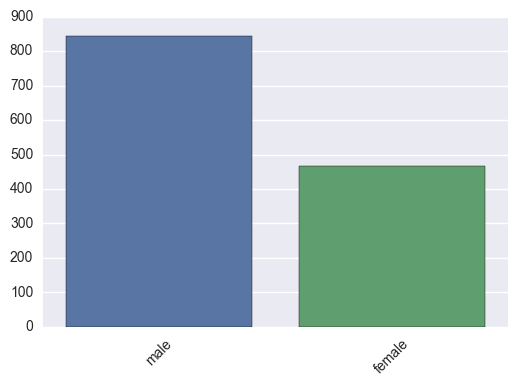

In [50]:
histplot_s(df, "Sex")

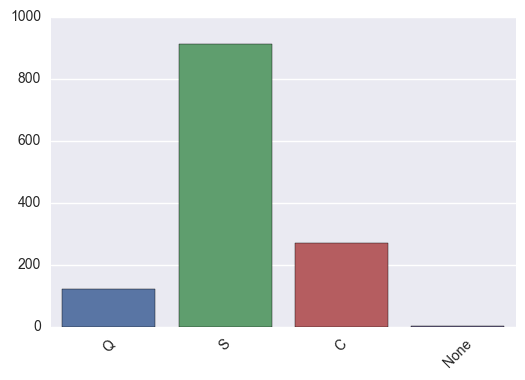

In [51]:
histplot_s(df, "Embarked")

#### Correlations

In [52]:
df.corr("Age", "Fare")

0.21349686667435705

In [53]:
df.corr("Age", "Survived")

0.005296468730662053

In [54]:
df.corr("Fare", "Survived")

0.1738945206553876

Currently, only *pearson* is supported.

### Missing Value Imputation

In [55]:
numVars = ['Survived','Age','SibSp','Parch','Fare']
stringVars = ['Cabin', 'Embarked', 'Pclass', 'Sex']

def countNull(df, var):
    return df.where(df[var].isNull()).count()

def countEmptyString(df, var):
    return df[df[var].isin("")].count()

def countZero(df, var):
    return df[df[var].isin(0)].count()

In [56]:
missing = {var: countNull(df, var) for var in df.columns}
missing

{'Age': 263,
 'Cabin': 1014,
 'Embarked': 2,
 'Fare': 1,
 'Mark': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

In [57]:
missing = {var: countEmptyString(df, var) for var in df.columns}
missing

{'Age': 0,
 'Cabin': 0,
 'Embarked': 0,
 'Fare': 0,
 'Mark': 0,
 'Name': 0,
 'Parch': 0,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 0,
 'Survived': 0,
 'Ticket': 0}

In [58]:
missing = {var: countZero(df, var) for var in df.columns}
missing

{'Age': 0,
 'Cabin': 0,
 'Embarked': 0,
 'Fare': 17,
 'Mark': 0,
 'Name': 0,
 'Parch': 1002,
 'PassengerId': 0,
 'Pclass': 0,
 'Sex': 0,
 'SibSp': 891,
 'Survived': 967,
 'Ticket': 0}

In [59]:
age_mean = df.groupBy().mean('Age').first()
age_mean

Row(avg(Age)=29.881137667305726)

In [60]:
age_mean[0]

29.881137667305726

In [61]:
age_mean = df.groupBy().mean('Age').first()[0]
fare_mean = df.groupBy().mean('Fare').first()[0]
age_mean, fare_mean

(29.881137667305726, 33.29547938203228)

In [62]:
df = df.na.fill({'Age':age_mean,'Fare':fare_mean, 'Embarked':'S'})

**What is wrong with what I just did?** How to fix it? (Replace `df` with ...)

### Outlier Treatment

* Univariate
    - Winsorization
* Multivariate

* Is it a good idea?
* Know your data

## Feature Engineering

### Applying Domain Expertise

In [63]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
 
## create user defined function to extract title
getTitle = udf(lambda name: name.split('.')[0].strip(), StringType())
df = df.withColumn('Title', getTitle(df['Name']))
 
df.select('Name','Title').show(5)

+--------------------+---------------+
|                Name|          Title|
+--------------------+---------------+
|Braund, Mr. Owen ...|     Braund, Mr|
|Cumings, Mrs. Joh...|   Cumings, Mrs|
|Heikkinen, Miss. ...|Heikkinen, Miss|
|Futrelle, Mrs. Ja...|  Futrelle, Mrs|
|Allen, Mr. Willia...|      Allen, Mr|
+--------------------+---------------+
only showing top 5 rows



In [107]:
getTitle = udf(lambda name: name.split('.')[0].split(',')[1].strip(), StringType())
df = df.withColumn('Title', getTitle(df['Name']))
 
df.select('Name','Title').show(15)

+--------------------+------+
|                Name| Title|
+--------------------+------+
|Braund, Mr. Owen ...|    Mr|
|Cumings, Mrs. Joh...|   Mrs|
|Heikkinen, Miss. ...|  Miss|
|Futrelle, Mrs. Ja...|   Mrs|
|Allen, Mr. Willia...|    Mr|
|    Moran, Mr. James|    Mr|
|McCarthy, Mr. Tim...|    Mr|
|Palsson, Master. ...|Master|
|Johnson, Mrs. Osc...|   Mrs|
|Nasser, Mrs. Nich...|   Mrs|
|Sandstrom, Miss. ...|  Miss|
|Bonnell, Miss. El...|  Miss|
|Saundercock, Mr. ...|    Mr|
|Andersson, Mr. An...|    Mr|
|Vestrom, Miss. Hu...|  Miss|
+--------------------+------+
only showing top 15 rows



### Categorical Variable treatment

**Some algorithms can handle categorical variables directly, some can't.**

* Label Encoder
    - It is used to transform non-numerical labels to numerical labels (or nominal categorical variables)
    - Numerical labels are always between 0 and n_classes-1
    - May introduce spurious relationship
        * Age and City
* One Hot Encoding
    - Encodes categorical integer features using a one-hot aka one-of-K scheme
    - Preferable

#### Label Encoding (Indexing)

In [65]:
catVars = ['Pclass','Sex','Embarked','Title']
 
## index Sex variable
si = StringIndexer(inputCol = 'Sex', outputCol = 'Sex_indexed')
df_indexed = si.fit(df).transform(df).drop('Sex').withColumnRenamed('Sex_indexed','Sex')

In [109]:
df_indexed.show(15)

+-----+--------+---------+-----+-----+-------+--------------+-----------+----------------+-------------+
| Mark|Survived|      Age|SibSp|Parch|   Fare|Pclass_indexed|Sex_indexed|Embarked_indexed|Title_indexed|
+-----+--------+---------+-----+-----+-------+--------------+-----------+----------------+-------------+
|train|       0|     22.0|    1|    0|   7.25|           0.0|        0.0|             0.0|          0.0|
|train|       1|     38.0|    1|    0|71.2833|           1.0|        1.0|             1.0|          2.0|
|train|       1|     26.0|    0|    0|  7.925|           0.0|        1.0|             0.0|          1.0|
|train|       1|     35.0|    1|    0|   53.1|           1.0|        1.0|             0.0|          2.0|
|train|       0|     35.0|    0|    0|   8.05|           0.0|        0.0|             0.0|          0.0|
|train|       0|29.881138|    0|    0| 8.4583|           0.0|        0.0|             2.0|          0.0|
|train|       0|     54.0|    0|    0|51.8625|         

In [110]:
catVars = ['Pclass','Sex', 'Embarked', 'Title']

# make use of pipeline to index all categorical variables
def indexer(col, df=df):
    si = StringIndexer(inputCol = col, outputCol = col+'_indexed')
    return si
 
indexers = [indexer(col) for col in catVars]

In [111]:
indexers

[StringIndexer_41a9b87003464fd0ab81,
 StringIndexer_46dc8cca3ce19c8c2c76,
 StringIndexer_46c1ad39d28c0d83a1c4,
 StringIndexer_4f7aa3c2a9fb272aceb2]

In [68]:
pipeline = Pipeline(stages = indexers)
df_indexed = pipeline.fit(df).transform(df)

df_indexed.select('Embarked','Embarked_indexed').show(3)

+--------+----------------+
|Embarked|Embarked_indexed|
+--------+----------------+
|       S|             0.0|
|       C|             1.0|
|       S|             0.0|
+--------+----------------+
only showing top 3 rows



* The categorical features are indexed in resulting data
* Embarked is mapped S=>0, C=>1, Q=>2

#### StringIndexer

* Maps a string column of labels to a column of label indices
* If the input column is numeric, we cast it to string and index the string values
* The indices are in [0, numLabels), ordered by label frequencies
    - So the most frequent label gets index 0.

#### Transformer

* transform one dataset into another

#### Estimator

* fit models to data

#### Pipelines

 
* A Pipeline consists of a sequence of stages, each of which is either an Estimator or a Transformer
* When Pipeline.fit() is called, the stages are executed in order
    - If a stage is an Estimator, its Estimator.fit() method will be called on the input dataset to fit a model
        * Then the model, which is a transformer, will be used to transform the dataset as the input to the next stage
    - If a stage is a Transformer, its Transformer.transform() method will be called to produce the dataset for the next stage
* The fitted model from a Pipeline is a PipelineModel, which consists of fitted models and transformers, corresponding to the pipeline stages
* If there are no stages, the pipeline acts as an identity transformer.

### Timeseries Variable treatments

* Shattering
* No time/day variables here

## Data format translation

* In this step, we get the data in the format or data type expected by the algorithms
* In the case of Spark MLlib, this includes 
    - local vector
    - dense or sparse vectors
    - labeled points
    - local matrix
    - distributed matrix with row matrix
    - indexed row matrix
    - coordinate matrix
    - block matrix

In our case, we need convert features to Vectors (either SparseVector or DenseVector).

In [69]:
from pyspark.sql import Row
from pyspark.ml.linalg import DenseVector

In [70]:
catVarsIndexed = [i + '_indexed' for i in catVars]
catVarsIndexed

['Pclass_indexed', 'Sex_indexed', 'Embarked_indexed', 'Title_indexed']

In [71]:
featuresCol = numVars + catVarsIndexed
featuresCol

['Survived',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_indexed',
 'Sex_indexed',
 'Embarked_indexed',
 'Title_indexed']

In [72]:
featuresCol.remove('Survived')
featuresCol

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_indexed',
 'Sex_indexed',
 'Embarked_indexed',
 'Title_indexed']

In [73]:
labelCol = ['Mark','Survived']
labelCol

['Mark', 'Survived']

In [74]:
row = Row('mark','label','features') 
row

<Row(mark, label, features)>

In [75]:
df_indexed = df_indexed[labelCol + featuresCol]
df_indexed

DataFrame[Mark: string, Survived: int, Age: float, SibSp: int, Parch: int, Fare: float, Pclass_indexed: double, Sex_indexed: double, Embarked_indexed: double, Title_indexed: double]

In [76]:
# 0-mark, 1-label, 2-features
# map features to DenseVector
lf = df_indexed.rdd.map(lambda r: (row(r[0], r[1], DenseVector(r[2:])))).toDF()
lf.show()

+-----+-----+--------------------+
| mark|label|            features|
+-----+-----+--------------------+
|train|    0|[22.0,1.0,0.0,7.2...|
|train|    1|[38.0,1.0,0.0,71....|
|train|    1|[26.0,0.0,0.0,7.9...|
|train|    1|[35.0,1.0,0.0,53....|
|train|    0|[35.0,0.0,0.0,8.0...|
|train|    0|[29.8811378479003...|
|train|    0|[54.0,0.0,0.0,51....|
|train|    0|[2.0,3.0,1.0,21.0...|
|train|    1|[27.0,0.0,2.0,11....|
|train|    1|[14.0,1.0,0.0,30....|
|train|    1|[4.0,1.0,1.0,16.7...|
|train|    1|[58.0,0.0,0.0,26....|
|train|    0|[20.0,0.0,0.0,8.0...|
|train|    0|[39.0,1.0,5.0,31....|
|train|    0|[14.0,0.0,0.0,7.8...|
|train|    1|[55.0,0.0,0.0,16....|
|train|    0|[2.0,4.0,1.0,29.1...|
|train|    1|[29.8811378479003...|
|train|    0|[31.0,1.0,0.0,18....|
|train|    1|[29.8811378479003...|
+-----+-----+--------------------+
only showing top 20 rows



In [77]:
# index label
# convert numeric label to categorical, which is required by
# decisionTree and randomForest
lf = StringIndexer(inputCol = 'label', outputCol='index').fit(lf).transform(lf)
 
lf.show(3)

+-----+-----+--------------------+-----+
| mark|label|            features|index|
+-----+-----+--------------------+-----+
|train|    0|[22.0,1.0,0.0,7.2...|  0.0|
|train|    1|[38.0,1.0,0.0,71....|  1.0|
|train|    1|[26.0,0.0,0.0,7.9...|  1.0|
+-----+-----+--------------------+-----+
only showing top 3 rows



### Split back into train/test data

In [78]:
train = lf.where(lf.mark =='train')
test = lf.where(lf.mark =='test')

In [79]:
# random split further to get train/validate
train, validate = train.randomSplit([0.7,0.3], seed =121)

In [80]:
print('Train Data Number of Row: '+ str(train.count()))
print('Validate Data Number of Row: '+ str(validate.count()))
print('Test Data Number of Row: '+ str(test.count()))

Train Data Number of Row: 637
Validate Data Number of Row: 254
Test Data Number of Row: 418


## Modeling

* ML is built based on DataFrame, while mllib is based on RDD
* We'll fit the logistic, decision tree and random forest models from ML packages

#### Logistic Regression

In [81]:
from pyspark.ml.classification import LogisticRegression
 
# regPara: lasso regularisation parameter (L1)
lr = LogisticRegression(maxIter = 100, regParam = 0.05, labelCol='index').fit(train)

In [82]:
# Evaluate model based on auc ROC(default for binary classification)
from pyspark.ml.evaluation import BinaryClassificationEvaluator
 
def testModel(model, validate = validate):
    pred = model.transform(validate)
    evaluator = BinaryClassificationEvaluator(labelCol = 'index')
    return evaluator.evaluate(pred)

In [83]:
print('AUC ROC of Logistic Regression model is: ' + str(testModel(lr)))

AUC ROC of Logistic Regression model is: 0.8285951045385012


In [84]:
print('AUC ROC of Logistic Regression model is: ' + str(testModel(lr, validate=test)))

AUC ROC of Logistic Regression model is: 0.0


In [85]:
pred_test = lr.transform(test)
pred_test.show(5)

+----+-----+--------------------+-----+--------------------+--------------------+----------+
|mark|label|            features|index|       rawPrediction|         probability|prediction|
+----+-----+--------------------+-----+--------------------+--------------------+----------+
|test|    0|[34.5,0.0,0.0,7.8...|  0.0|[1.50093878184650...|[0.81771445043407...|       0.0|
|test|    0|[47.0,1.0,0.0,7.0...|  0.0|[0.33504871153120...|[0.58298729666084...|       0.0|
|test|    0|[62.0,0.0,0.0,9.6...|  0.0|[0.98902877893260...|[0.72889604532691...|       0.0|
|test|    0|[27.0,0.0,0.0,8.6...|  0.0|[1.86527300534768...|[0.86591037672668...|       0.0|
|test|    0|[22.0,1.0,1.0,12....|  0.0|[-0.1359069367112...|[0.46607546723044...|       1.0|
+----+-----+--------------------+-----+--------------------+--------------------+----------+
only showing top 5 rows



#### More Models

In [123]:
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
 
dt = DecisionTreeClassifier(maxDepth = 15, labelCol ='index').fit(train)
#rf = RandomForestClassifier(numTrees = 100, labelCol = 'index').fit(train)
#gbt = GBTClassifier(maxIter = 10, labelCol = 'index').fit(train)


In [124]:
models = {'LogisticRegression':lr,
          'DecistionTree':dt,
          'RandomForest':rf}
 
modelPerf = {k:testModel(v) for k,v in models.items()}
print(modelPerf)

{'RandomForest': 0.8470168281489037, 'LogisticRegression': 0.828595104538501, 'DecistionTree': 0.7952256501784802}


In [88]:
def model_acc(model, validate=validate):
    pred = model.transform(validate)
    eval_vec = np.array(get_column(pred, "label")) == np.array(get_column(pred, "prediction")) 
    return(eval_vec.sum()/len(eval_vec))

In [89]:
model_acc(gbt)

0.77559055118110232

In [90]:
models = {'LogisticRegression':lr,
          'DecistionTree':dt,
          'RandomForest':rf,
          'GradientBoostingMachines':gbt}

modelPerf = {k:model_acc(v) for k,v in models.items()}
print(modelPerf)

{'RandomForest': 0.80314960629921262, 'LogisticRegression': 0.79133858267716539, 'GradientBoostingMachines': 0.77559055118110232, 'DecistionTree': 0.79133858267716539}


#### Tuning

In [91]:
for i in range(10):
    dt = DecisionTreeClassifier(maxDepth = i, labelCol ='index').fit(train)
    print('AUC ROC of Decision Tree model is' + '(for maxDepth= ' + str(i) + '): ' + str(testModel(dt)))

AUC ROC of Decision Tree model is(for maxDepth= 0): 0.5
AUC ROC of Decision Tree model is(for maxDepth= 1): 0.75790413054564
AUC ROC of Decision Tree model is(for maxDepth= 2): 0.8093128505864354
AUC ROC of Decision Tree model is(for maxDepth= 3): 0.5850012748597655
AUC ROC of Decision Tree model is(for maxDepth= 4): 0.5783720040795511
AUC ROC of Decision Tree model is(for maxDepth= 5): 0.6147055073941866
AUC ROC of Decision Tree model is(for maxDepth= 6): 0.6425930647628761
AUC ROC of Decision Tree model is(for maxDepth= 7): 0.6685683324834268
AUC ROC of Decision Tree model is(for maxDepth= 8): 0.7060810810810811
AUC ROC of Decision Tree model is(for maxDepth= 9): 0.7025752167261601


In [92]:
for i in range(5, 200):
    rf = RandomForestClassifier(numTrees = i, labelCol = 'index').fit(train)
    print('AUC ROC of Random Forest model is' + '(for numTrees= ' + str(i) + '): ' + str(testModel(rf)))

AUC ROC of Random Forest model is(for numTrees= 5): 0.8349694033656299
AUC ROC of Random Forest model is(for numTrees= 6): 0.8386027536970935
AUC ROC of Random Forest model is(for numTrees= 7): 0.836116777154513
AUC ROC of Random Forest model is(for numTrees= 8): 0.8383159102498728
AUC ROC of Random Forest model is(for numTrees= 9): 0.8350650178480369
AUC ROC of Random Forest model is(for numTrees= 10): 0.8500764915859256
AUC ROC of Random Forest model is(for numTrees= 11): 0.8490566037735849
AUC ROC of Random Forest model is(for numTrees= 12): 0.8397182559918407
AUC ROC of Random Forest model is(for numTrees= 13): 0.8459650688424273
AUC ROC of Random Forest model is(for numTrees= 14): 0.8412799592044876
AUC ROC of Random Forest model is(for numTrees= 15): 0.8467618561958185
AUC ROC of Random Forest model is(for numTrees= 16): 0.8523393676695565
AUC ROC of Random Forest model is(for numTrees= 17): 0.850682049974503
AUC ROC of Random Forest model is(for numTrees= 18): 0.8471761856195819

In [93]:
model= rf.transform(test)

In [94]:
model.show(40)

+----+-----+--------------------+-----+--------------------+--------------------+----------+
|mark|label|            features|index|       rawPrediction|         probability|prediction|
+----+-----+--------------------+-----+--------------------+--------------------+----------+
|test|    0|[34.5,0.0,0.0,7.8...|  0.0|[183.577442407706...|[0.92249971059148...|       0.0|
|test|    0|[47.0,1.0,0.0,7.0...|  0.0|[123.830168867146...|[0.62226215511128...|       0.0|
|test|    0|[62.0,0.0,0.0,9.6...|  0.0|[170.103694550491...|[0.85479243492709...|       0.0|
|test|    0|[27.0,0.0,0.0,8.6...|  0.0|[172.721743409628...|[0.86794845934486...|       0.0|
|test|    0|[22.0,1.0,1.0,12....|  0.0|[94.8986948934326...|[0.47687786378609...|       1.0|
|test|    0|[14.0,0.0,0.0,9.2...|  0.0|[171.011578132445...|[0.85935466398213...|       0.0|
|test|    0|[30.0,0.0,0.0,7.6...|  0.0|[94.8274791871986...|[0.47651999591557...|       1.0|
|test|    0|[26.0,1.0,1.0,29....|  0.0|[163.044159674930...|[0.8193173

In [125]:
model.toPandas()#.to_csv('submission_titanic.csv')

mark  label                                           features  index  \
0    test      0  [34.5, 0.0, 0.0, 7.82919979095, 0.0, 0.0, 2.0,...    0.0   
1    test      0          [47.0, 1.0, 0.0, 7.0, 0.0, 1.0, 0.0, 2.0]    0.0   
2    test      0       [62.0, 0.0, 0.0, 9.6875, 2.0, 0.0, 2.0, 0.0]    0.0   
3    test      0  [27.0, 0.0, 0.0, 8.66250038147, 0.0, 0.0, 0.0,...    0.0   
4    test      0  [22.0, 1.0, 1.0, 12.2875003815, 0.0, 1.0, 0.0,...    0.0   
5    test      0  [14.0, 0.0, 0.0, 9.22500038147, 0.0, 0.0, 0.0,...    0.0   
6    test      0  [30.0, 0.0, 0.0, 7.62919998169, 0.0, 1.0, 2.0,...    0.0   
7    test      0         [26.0, 1.0, 1.0, 29.0, 2.0, 0.0, 0.0, 0.0]    0.0   
8    test      0  [18.0, 0.0, 0.0, 7.22919988632, 0.0, 1.0, 1.0,...    0.0   
9    test      0  [21.0, 2.0, 0.0, 24.1499996185, 0.0, 0.0, 0.0,...    0.0   
10   test      0  [29.8811378479, 0.0, 0.0, 7.89580011368, 0.0, ...    0.0   
11   test      0         [46.0, 0.0, 0.0, 26.0, 1.0, 0.0, 0.0, 0.0]    0.0   
12   test      0  [23.0, 1.0, 0.0, 82.2667007446, 1.0, 1.0, 0.0,...    0.0   
13   test      0         [63.0, 1.0, 0.0, 26.0, 2.0, 0.0, 0.0, 0.0]    0.0   
14   test      0  [47.0, 1.0, 0.0, 61.1749992371, 1.0, 1.0, 0.0,...    0.0   
15   test      0  [24.0, 1.0, 0.0, 27.7208003998, 2.0, 1.0, 1.0,...    0.0   
16   test      0  [35.0, 0.0, 0.0, 12.3500003815, 2.0, 0.0, 2.0,...    0.0   
17   test      0  [21.0, 0.0, 0.0, 7.22499990463, 0.0, 0.0, 1.0,...    0.0   
18   test      0  [27.0, 1.0, 0.0, 7.92500019073, 0.0, 1.0, 0.0,...    0.0   
19   test      0  [45.0, 0.0, 0.0, 7.22499990463, 0.0, 1.0, 1.0,...    0.0   
20   test      0  [55.0, 1.0, 0.0, 59.4000015259, 1.0, 0.0, 1.0,...    0.0   
21   test      0  [9.0, 0.0, 1.0, 3.17079997063, 0.0, 0.0, 0.0, ...    0.0   
22   test      0  [29.8811378479, 0.0, 0.0, 31.6833000183, 1.0, ...    0.0   
23   test      0  [21.0, 0.0, 1.0, 61.3791999817, 1.0, 0.0, 1.0,...    0.0   
24   test      0      [48.0, 1.0, 3.0, 262.375, 1.0, 1.0, 1.0, 2.0]    0.0   
25   test      0         [50.0, 1.0, 0.0, 14.5, 0.0, 0.0, 0.0, 0.0]    0.0   
26   test      0  [22.0, 0.0, 1.0, 61.9791984558, 1.0, 1.0, 1.0,...    0.0   
27   test      0  [22.5, 0.0, 0.0, 7.22499990463, 0.0, 0.0, 1.0,...    0.0   
28   test      0         [41.0, 0.0, 0.0, 30.5, 1.0, 0.0, 0.0, 0.0]    0.0   
29   test      0  [29.8811378479, 2.0, 0.0, 21.6791992188, 0.0, ...    0.0   
..    ...    ...                                                ...    ...   
388  test      0         [21.0, 0.0, 0.0, 7.75, 0.0, 0.0, 2.0, 0.0]    0.0   
389  test      0  [6.0, 3.0, 1.0, 21.0750007629, 0.0, 0.0, 0.0, ...    0.0   
390  test      0         [23.0, 0.0, 0.0, 93.5, 1.0, 0.0, 0.0, 0.0]    0.0   
391  test      0  [51.0, 0.0, 1.0, 39.4000015259, 1.0, 1.0, 0.0,...    0.0   
392  test      0        [13.0, 0.0, 2.0, 20.25, 0.0, 0.0, 0.0, 3.0]    0.0   
393  test      0         [47.0, 0.0, 0.0, 10.5, 2.0, 0.0, 0.0, 0.0]    0.0   
394  test      0  [29.0, 3.0, 1.0, 22.0249996185, 0.0, 0.0, 0.0,...    0.0   
395  test      0         [18.0, 1.0, 0.0, 60.0, 1.0, 1.0, 0.0, 2.0]    0.0   
396  test      0         [24.0, 0.0, 0.0, 7.25, 0.0, 0.0, 2.0, 0.0]    0.0   
397  test      0  [48.0, 1.0, 1.0, 79.1999969482, 1.0, 1.0, 1.0,...    0.0   
398  test      0  [22.0, 0.0, 0.0, 7.77500009537, 0.0, 0.0, 0.0,...    0.0   
399  test      0  [31.0, 0.0, 0.0, 7.73330020905, 0.0, 0.0, 2.0,...    0.0   
400  test      0  [30.0, 0.0, 0.0, 164.866699219, 1.0, 1.0, 0.0,...    0.0   
401  test      0         [38.0, 1.0, 0.0, 21.0, 2.0, 0.0, 0.0, 0.0]    0.0   
402  test      0  [22.0, 0.0, 1.0, 59.4000015259, 1.0, 1.0, 1.0,...    0.0   
403  test      0  [17.0, 0.0, 0.0, 47.0999984741, 1.0, 0.0, 0.0,...    0.0   
404  test      0  [43.0, 1.0, 0.0, 27.7208003998, 1.0, 0.0, 1.0,...    0.0   
405  test      0  [20.0, 0.0, 0.0, 13.8625001907, 2.0, 0.0, 1.0,...    0.0   
406  test      0         [23.0, 1.0, 0.0, 10.5, 2.0, 0.0, 0.0, 0.0]    0.0   
407  test      0        [50

In [ ]:
#sc.stop()